In [186]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [75]:
housing=pd.read_excel('housing.xlsx')

In [76]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [77]:
housing.columns
#you can see there is white spaces in the column names

Index(['CRIM    ', 'ZN      ', 'INDUS   ', 'CHAS    ', 'NOX     ', 'RM      ',
       'AGE     ', 'DIS     ', 'RAD     ', ' TAX    ', ' PTRATIO', ' B      ',
       ' LSTAT  ', ' MEDV   '],
      dtype='object')

In [78]:
housing.info()
#you can see here too(colums after 8th RAD are indented)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9    TAX      506 non-null    int64  
 10   PTRATIO  506 non-null    float64
 11   B        506 non-null    float64
 12   LSTAT    506 non-null    float64
 13   MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [79]:
for i in housing.columns:
    print(len(i))
#names with different length but have the fixed string lenght here

8
8
8
8
8
8
8
8
8
8
8
8
8
8


In [80]:
dict={}
for i,j in zip(housing.columns,housing.columns.str.strip()):
    dict[i]=j
dict
#str.strip() is a method of df that removes white space from left & right of string(Not n between)

{'CRIM    ': 'CRIM',
 'ZN      ': 'ZN',
 'INDUS   ': 'INDUS',
 'CHAS    ': 'CHAS',
 'NOX     ': 'NOX',
 'RM      ': 'RM',
 'AGE     ': 'AGE',
 'DIS     ': 'DIS',
 'RAD     ': 'RAD',
 ' TAX    ': 'TAX',
 ' PTRATIO': 'PTRATIO',
 ' B      ': 'B',
 ' LSTAT  ': 'LSTAT',
 ' MEDV   ': 'MEDV'}

In [81]:
housing=housing.rename(columns=dict)

In [82]:
for i in housing.columns:
    print(len(i))
#now it's of different length

4
2
5
4
3
2
3
3
3
3
7
1
5
4


In [85]:
housing.columns
#now white space free

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [84]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [88]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [87]:
housing.value_counts('CHAS')
#we're checking it to see if it's biased(as it's the only CATEGORIZED data)

CHAS
0    471
1     35
Name: count, dtype: int64

In [89]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

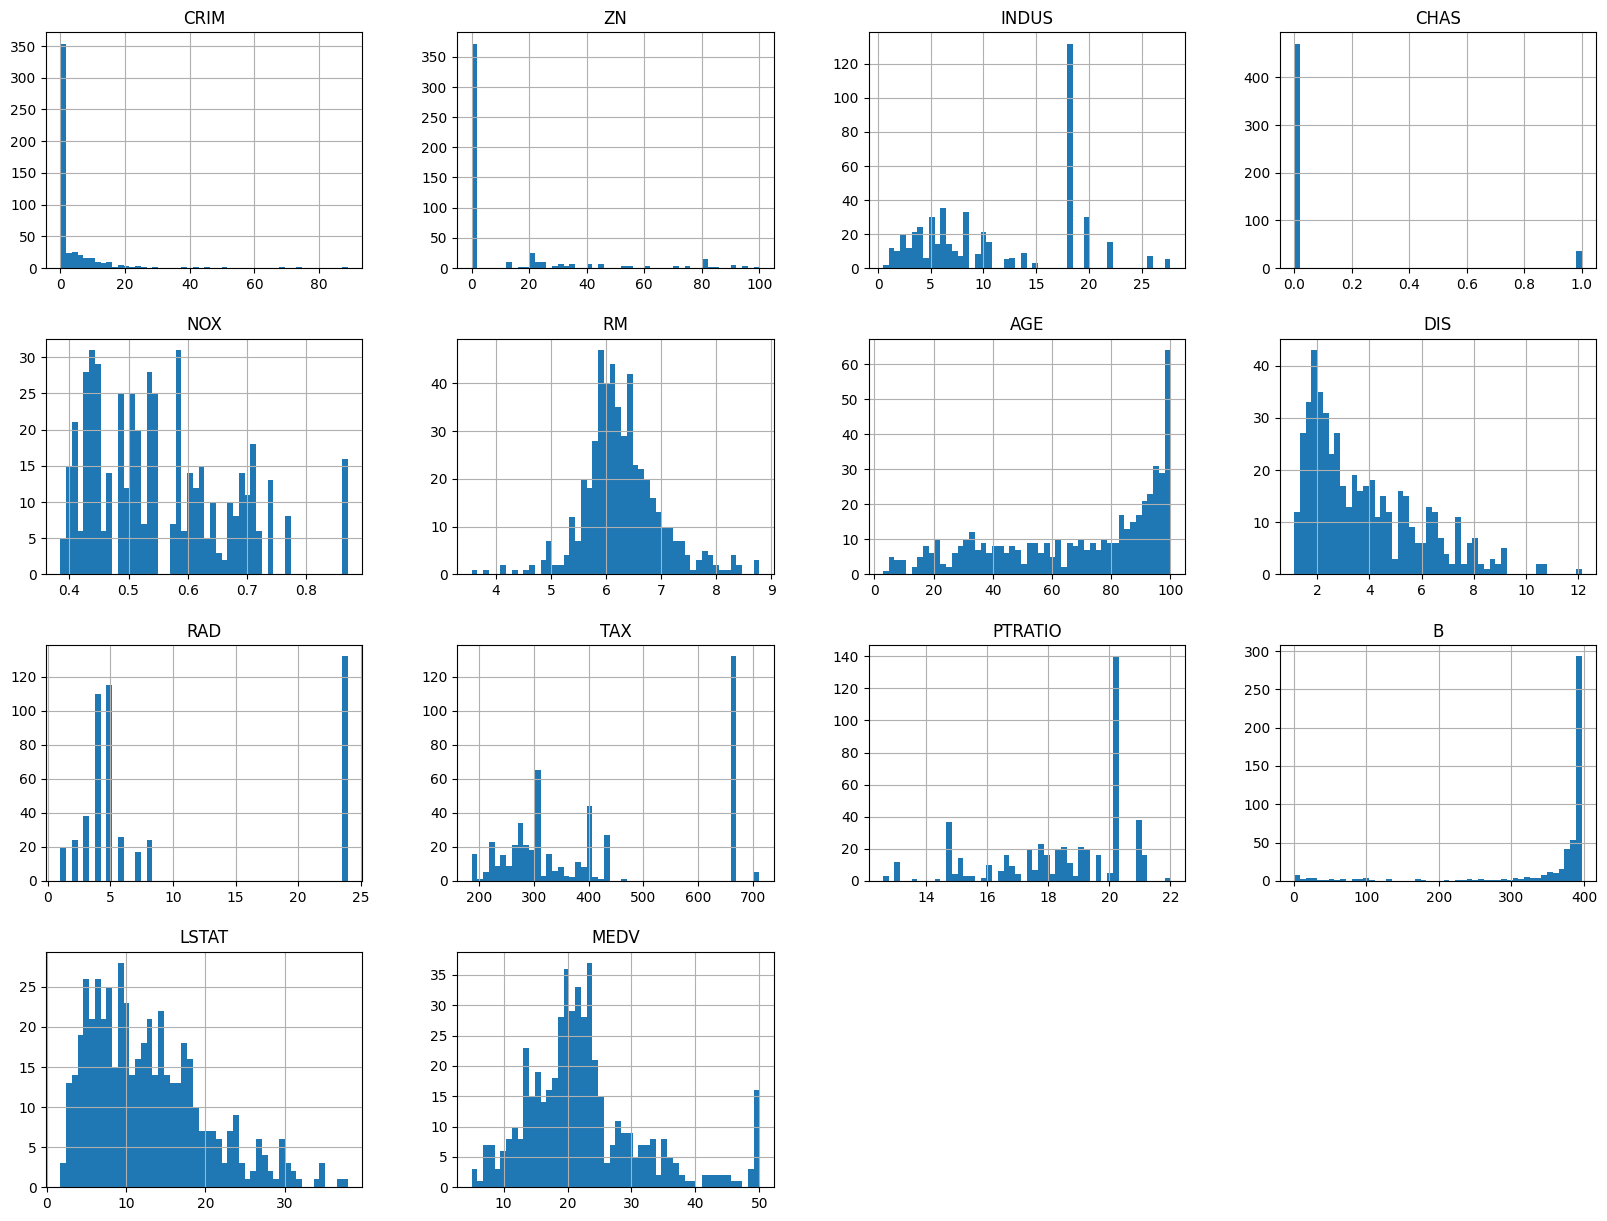

In [148]:
housing.hist(bins=50,figsize=(20,15)) 
#figsize is the dimension in inched of the output graph(as a whole not individual graph)
#(20,15) is the best size as i experienced on my laptop

In [158]:
np.random.seed(42)
np.random.permutation(len(housing))
#shuffles/generates random permuation of range of numbers : 0 to 506-1
#this will shuffle the row indices of the datagrame housing
#so when we split it then, it will take the random as indices are shuffled

array([173, 274, 491,  72, 452,  76, 316, 140, 471, 500, 218,   9, 414,
        78, 323, 473, 124, 388, 195, 448, 271, 278,  30, 501, 421, 474,
        79, 454, 210, 497, 172, 320, 375, 362, 467, 153,   2, 336, 208,
        73, 496, 307, 204,  68,  90, 390,  33,  70, 470,   0,  11, 281,
        22, 101, 268, 485, 442, 290,  84, 245,  63,  55, 229,  18, 351,
       209, 395,  82,  39, 456,  46, 481, 444, 355,  77, 398, 104, 203,
       381, 489,  69, 408, 255, 392, 312, 234, 460, 324,  93, 137, 176,
       417, 131, 346, 365, 132, 371, 412, 436, 411,  86,  75, 477,  15,
       332, 423,  19, 325, 335,  56, 437, 409, 334, 181, 227, 434, 180,
        25, 493, 238, 244, 250, 418, 117,  42, 322, 347, 182, 155, 280,
       126, 329,  31, 113, 148, 432, 338,  57, 194,  24,  17, 298,  66,
       211, 404,  94, 154, 441,  23, 225, 433, 447,   5, 116,  45,  16,
       468, 360,   3, 405, 185,  60, 110, 321, 265,  29, 262, 478,  26,
         7, 492, 108,  37, 157, 472, 118, 114, 175, 192, 272, 14

In [156]:
np.random.permutation(len(housing))
#you see seed() works only within the cell(above cell see() is not doing anything

array([353, 162, 337, 192, 202,   5, 261,  67, 159,  51, 231, 309,  57,
       313, 471, 229,  90, 485, 182,  47, 451, 166, 477,  70, 255, 190,
       245, 200, 486,  27, 430, 205, 500, 280,  78, 273, 305, 393, 237,
        29, 276, 268, 501, 316, 211, 367,  49, 104, 173, 494, 207, 216,
       379, 350,  76, 251,  15, 388, 226, 234, 373,  44, 154, 368,  79,
       461, 239, 247, 334, 232, 169, 303, 198, 248, 413, 326, 365, 233,
       278, 120, 424, 444, 275, 259,  43,   2, 397, 446, 339, 371,  42,
        60, 428, 481, 414, 206, 101, 322,  65, 351,  72, 115, 464, 180,
       361,  82, 191, 386,  32,  55, 358, 168, 220, 342, 346, 218, 415,
       184, 341, 408, 249, 263, 257, 125, 185, 222,  20, 279,  25, 265,
       204, 465, 106, 238, 194,  63, 254, 335, 489, 240,  11, 163, 384,
        30, 244,  26, 376, 463, 311, 499, 457, 121, 437,  33,  40,  99,
       402, 363, 283, 145,  69, 469, 189,  97, 108, 203, 421,   3,  21,
       102, 479,  39,   8, 422, 436, 262, 300,  58, 225, 271,  8

In [107]:
506 in np.random.permutation(len(housing))

False

In [108]:
505 in np.random.permutation(len(housing))

True

In [172]:
def splitData(data,test_ratio): #test ratio is the ratio train data size : test data size
    np.random.seed(42) #42 is the parampara
    shuffled_indices=np.random.permutation(len(data))
    test_size=int(len(data)*test_ratio)
    train_indices=shuffled_indices[test_size:]
    test_indices=shuffled_indices[:test_size]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set,test_set=splitData(housing,0.2)
print(f'rows in train_set: {len(train_set)}\nrows in test_set: {len(test_set)}')

rows in train_set: 405
rows in test_set: 101


## we can also use the same split function from the sklearn : train_test_split()


In [181]:
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f'rows in train_set: {len(train_set)}\nrows in test_set: {len(test_set)}')
#random_state=seed=42
#you see it's giving priority to reserve 20 or 20+ percent of the data for testing)

rows in train_set: 404
rows in test_set: 102


In [179]:
s=506*(20/100)
s

101.2

In [180]:
np.ceil(s)

102.0

## categorical data can be mislead ML if split with bias e.g. 'CHAS'
- Stratified shuffle is a technique used to ensure that each subset of data (e.g., training and testing sets) maintains the same distribution of a specific variable (typically a class label/categorized data) as the original dataset.
- when working with imbalanced datasets(as you can see CHAS distribution is imbalanced btw 0 & 1), where some classes are significantly more prevalent than others.
- it ensures that each class is appropriately represented in both training and testing sets.

In [182]:
housing.value_counts('CHAS')
# see how most of the values are 1

CHAS
0    471
1     35
Name: count, dtype: int64

In [185]:
471/35
# pehle se hi 13 times hai, agar galat split ho gaya random module se to aur bhi  ratio bigad jayega
#e.g. in tain_set 1 is 30 times than 0 then it will mislead ML

13.457142857142857

In [187]:
train_set.value_counts('CHAS')

CHAS
0    375
1     29
Name: count, dtype: int64

In [188]:
test_set.value_counts('CHAS')

CHAS
0    96
1     6
Name: count, dtype: int64

In [196]:
print(375/29)
print(96/6)
#dekha ratio bigad rha hai aur ye model ko mislead kr dega
#taining me raio(12) & test me 16 par original hai 13
#kaise chalega
#bole to this minority values ko barabar batana padega in train-test split

12.931034482758621
16.0


In [212]:
stratified_shuffled_splitIndices_Object=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
type(stratified_shuffled_splitIndices_Object)
#returns 2 array : array of train indices & ar. of test indices
#split 3 times/re-shuffle 3 times
#we can also give train_size in place of tes_size or both

sklearn.model_selection._split.StratifiedShuffleSplit

In [234]:
train_indices=[]
test_indices=[]
k=0
for i, j in stratified_shuffled_splitIndices_Object.split(housing,housing['CHAS']):
    tain_indices.append(i)
    test_indices.append(j)
    print(f"iteration: {k}")
    k+=1

iteration: 0


In [218]:
train_indices=[i for i, j in stratified_shuffled_splitIndices_Object.split(housing,housing['CHAS'])]
test_indices=[j for i, j in zip(stratified_shuffled_splitIndices_Object.split(housing,housing['CHAS']))]
print(test_indices,type(test_indices),sep='\n')

ValueError: not enough values to unpack (expected 2, got 1)

In [229]:
list(stratified_shuffled_splitIndices_Object.split(housing,housing['CHAS']))
#you see the object.splt is like a zip OBJECT
#similar to zip(train_indices_array, test_indices array)
#can't assign it directly like (a,b)=object
#instead access (elements tuple) wise using FOR LOOP

[(array([254, 348, 476, 321, 326, 411, 250, 100, 429,  57, 413, 115, 490,
         199, 494, 142, 113, 468, 400, 247, 151, 408,  68, 365,  81,  93,
         456, 116,  27, 234, 140,  47, 382, 377, 366, 185,  73, 267, 231,
         118,  96,  40, 182, 417, 492, 373, 294, 482,  62, 414, 289,  72,
         314,  89, 129, 157, 110, 343, 200, 310, 462, 361,  95,  37, 145,
         227, 166,  23,  85, 281, 285, 264, 501, 440, 241, 473,   0, 488,
         452, 323, 252, 416, 119,  60, 251, 409, 191,  42, 188, 412,  92,
         353, 292, 107,  12,   3, 364, 339, 301, 467, 376, 280, 309, 202,
          61,  24, 122, 164, 278, 139,  10, 415, 390, 338, 445, 486, 156,
         179, 159,  22, 318, 404, 425,  45,  74, 147, 431, 215, 434,  44,
          83, 144, 500, 406, 161, 331, 243, 293,  86, 162, 458, 359, 295,
         124, 341, 244, 319, 337,  15, 384, 248, 441, 258,  31, 481, 450,
         316,  66,  56, 211, 184, 325,  41,  11, 262, 491, 177, 369, 249,
         238, 125,   5, 224, 235, 334,

In [214]:
train_set=housing.iloc[train_indices]
test_set=housing.iloc[test_indices]
print(train_set.value_counts('CHAS'),test_set.value_counts('CHAS'),sep="\n")

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [210]:
housing.iloc[[1,2,3]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [231]:
train_indices=[i for i, j in stratified_shuffled_splitIndices_Object.split(housing,housing['CHAS'])]
test_indices=[j for i, j in stratified_shuffled_splitIndices_Object.split(housing,housing['CHAS'])]
print(test_indices,type(test_indices),sep='\n')

[array([342, 379, 223, 219,  48, 134,  49, 448, 197, 273, 495, 374, 360,
       407, 336, 383, 284,  34, 320, 221, 130, 106, 380, 176, 102, 290,
       451, 275, 385, 198, 286, 487, 173, 378, 168, 394, 261,  43, 333,
       256, 213, 263, 357,  53, 105, 303, 232, 340, 465, 355, 498,  20,
       297, 356, 296, 237, 225, 194,  54,  13, 195, 401, 346, 181, 478,
        99, 167, 470, 150, 291, 160,  91, 230, 330, 196, 489, 153, 255,
       335, 322,  87, 505, 424,   1,  50, 480, 420,  71, 502,  58,  21,
        80, 398, 272, 422, 300, 493,  88, 466,  52, 121, 218], dtype=int64)]
<class 'list'>


In [235]:
a=np.array([1,2,3])
l=[i for i in a]
print(a,l,sep='\n')

[1 2 3]
[1, 2, 3]


In [252]:
for i,j in stratified_shuffled_splitIndices_Object.split(housing,housing['CHAS']):
    train_indices=i
    test_indices=j
print(test_indices,type(test_indices))

[342 379 223 219  48 134  49 448 197 273 495 374 360 407 336 383 284  34
 320 221 130 106 380 176 102 290 451 275 385 198 286 487 173 378 168 394
 261  43 333 256 213 263 357  53 105 303 232 340 465 355 498  20 297 356
 296 237 225 194  54  13 195 401 346 181 478  99 167 470 150 291 160  91
 230 330 196 489 153 255 335 322  87 505 424   1  50 480 420  71 502  58
  21  80 398 272 422 300 493  88 466  52 121 218] <class 'numpy.ndarray'>


In [253]:
list_test_indices=[i for i in test_indices]
housing.iloc[list_test_indices]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [254]:
housing.iloc[list_test_indices].value_counts('CHAS')

CHAS
0    95
1     7
Name: count, dtype: int64

In [255]:
list_train_indices=[i for i in train_indices]
housing.iloc[list_train_indices].value_counts('CHAS')

CHAS
0    376
1     28
Name: count, dtype: int64

In [256]:
95/7

13.571428571428571

In [257]:
376/28

13.428571428571429

In [258]:
housing.value_counts('CHAS')

CHAS
0    471
1     35
Name: count, dtype: int64

In [259]:
471/35

13.457142857142857

### now you can see that ratio of 13:1 is maintained

In [263]:
train_set=housing.iloc[list_train_indices]
test_set=housing.iloc[list_test_indices]

In [264]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [265]:
train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


# correlation

In [268]:
corr=housing.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [283]:
# check how different vars affecting MEDV
corr.loc[:,['MEDV']].sort_values('MEDV',ascending=False)

,MEDV
MEDV,1.000000
RM,0.695360
ZN,0.360445
B,0.333461
DIS,0.249929
CHAS,0.175260
AGE,-0.376955
RAD,-0.381626
CRIM,-0.388305
NOX,-0.427321


In [339]:
focus=['MEDV','RM','ZN','CHAS','LSTAT'] 
#either most +ve or most -ve
#plot 5x5 =25 graphs
#it will not look scatter but histogram in btw 2 same attributes

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='CHAS', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='CHAS', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='CHAS', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='CHAS'>,
        <Axes: xlabel='RM', ylabel='CHAS'>,
        <Axes: xlabel='ZN', ylabel='CHAS'>,
        <Axes: xlabel='CHAS', ylabel='CHAS'>,
        <Axes: xlabel='LSTAT', ylabel='CHAS'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: x

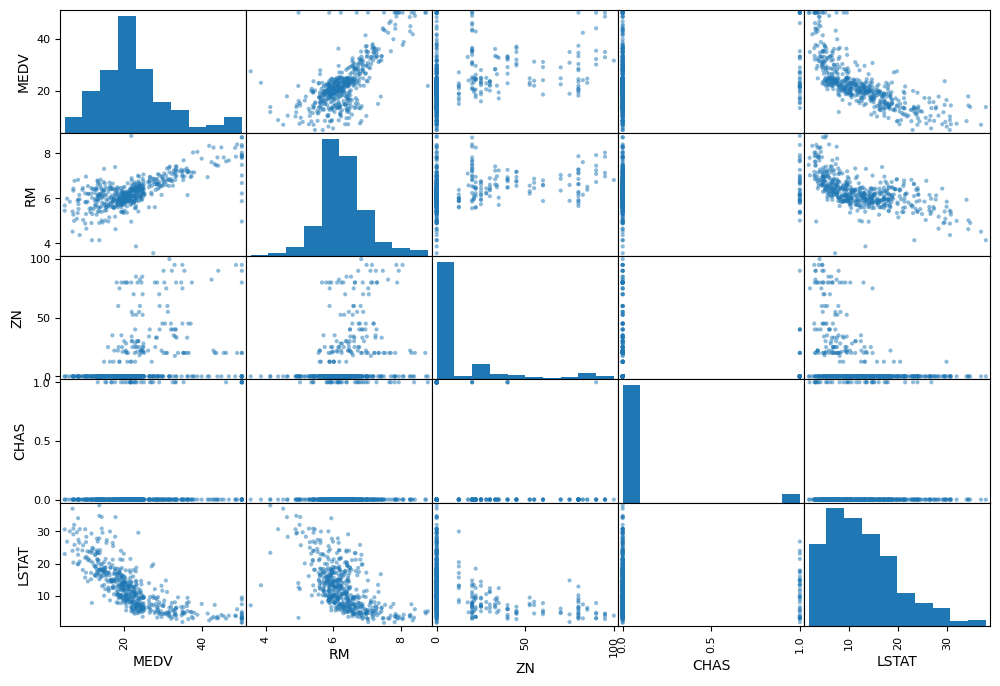

In [288]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[focus],figsize=(12,8))
#idk why i need to import a module from the library when i've allready imported the whole library

# why not a straght line but a histogram in case of scatter plot btw 2 same attributes
- because histogram will give a better insight about the plot btw same plot
- we already know it would be a st. line but with histogram we can get the idea of distribution of values among the population(i.e. what value lies in what range)

# since our target var is MEDV
- we see RM vs MEDV , LSTAT vs MEDV interseting

<Axes: xlabel='RM', ylabel='MEDV'>

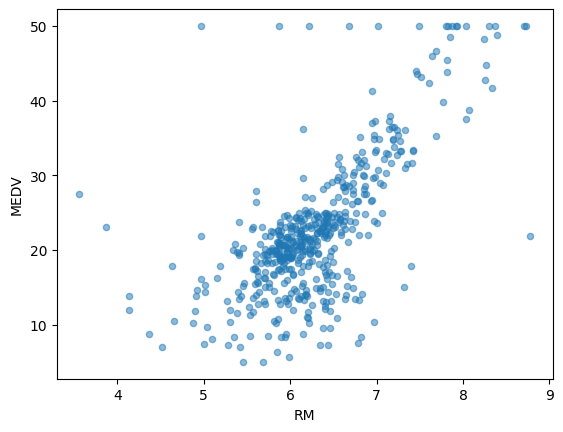

In [313]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.5)
#alpha helps in visualizing overlapping points(tells if more dense or not)

Text(0, 0.5, 'MEDV : median value of home[in 1000s $]')

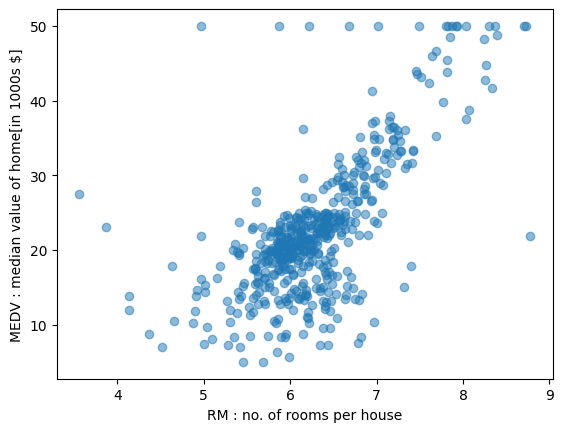

In [314]:
plt.scatter(x=housing['RM'],y=housing['MEDV'], alpha=0.5)
#abouve will not have labels, have to put manually
#but it give me customizability to write something else
#like RM ki jagah : rooms per house
plt.xlabel("RM : no. of rooms per house")
plt.ylabel("MEDV : median value of home[in 1000s $]")

# explore new/custom attributes
` TPR=TAX/RM` : tax per room

In [303]:
housing['TPR']=housing['TAX']/housing['RM']
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TPR
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,41.407553
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,44.607843
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,39.134174
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,40.182514


In [310]:
corr=housing.corr()
corr[['MEDV']].sort_values('MEDV',ascending=False)

,MEDV
MEDV,1.000000
RM,0.695360
ZN,0.360445
B,0.333461
DIS,0.249929
CHAS,0.175260
AGE,-0.376955
RAD,-0.381626
CRIM,-0.388305
NOX,-0.427321


### ⬆️
- you see TPR is strongly correlated with MEDV(even better that TAX & PTRATIO)
- so lets include TPR in EDA

In [338]:
l=['MEDV','RM','ZN','CHAS','LSTAT']
l1=focus.append('TPR')  
print(new_focus)
#this is wrong #append will change in the original list & nothing(None) will come in new list
# use concatenation(list addition operation) or use the original list

['MEDV', 'RM', 'ZN', 'CHAS', 'LSTAT', 'TPR', 'hello', 'hello', 'TPR']


In [323]:
print("helllo")

helllo


In [336]:
l=[1,2,3]
l1=l
l1

[1, 2, 3]

In [337]:
l1.append("hello")
print(l,l1,sep='\n')
#you see dono me append hua
#bachke bhai  appned is very dangerous specially with notebook,with every append it will change

[1, 2, 3, 'hello']
[1, 2, 3, 'hello']


In [342]:
new_focus=focus+["TPR"]
#it will add TPR to the end  but i need it on second last(do it manually)
new_focus=['MEDV','RM','ZN','CHAS','TPR','LSTAT'] 

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='CHAS', ylabel='MEDV'>,
        <Axes: xlabel='TPR', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='CHAS', ylabel='RM'>,
        <Axes: xlabel='TPR', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='CHAS', ylabel='ZN'>,
        <Axes: xlabel='TPR', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='CHAS'>,
        <Axes: xlabel='RM', ylabel='CHAS'>,
        <Axes: xlabel='ZN', ylabel='CHAS'>,
        <Axes: xlabel='CHAS', ylabel='CHAS'>,
        <Axes: xlabel='TP

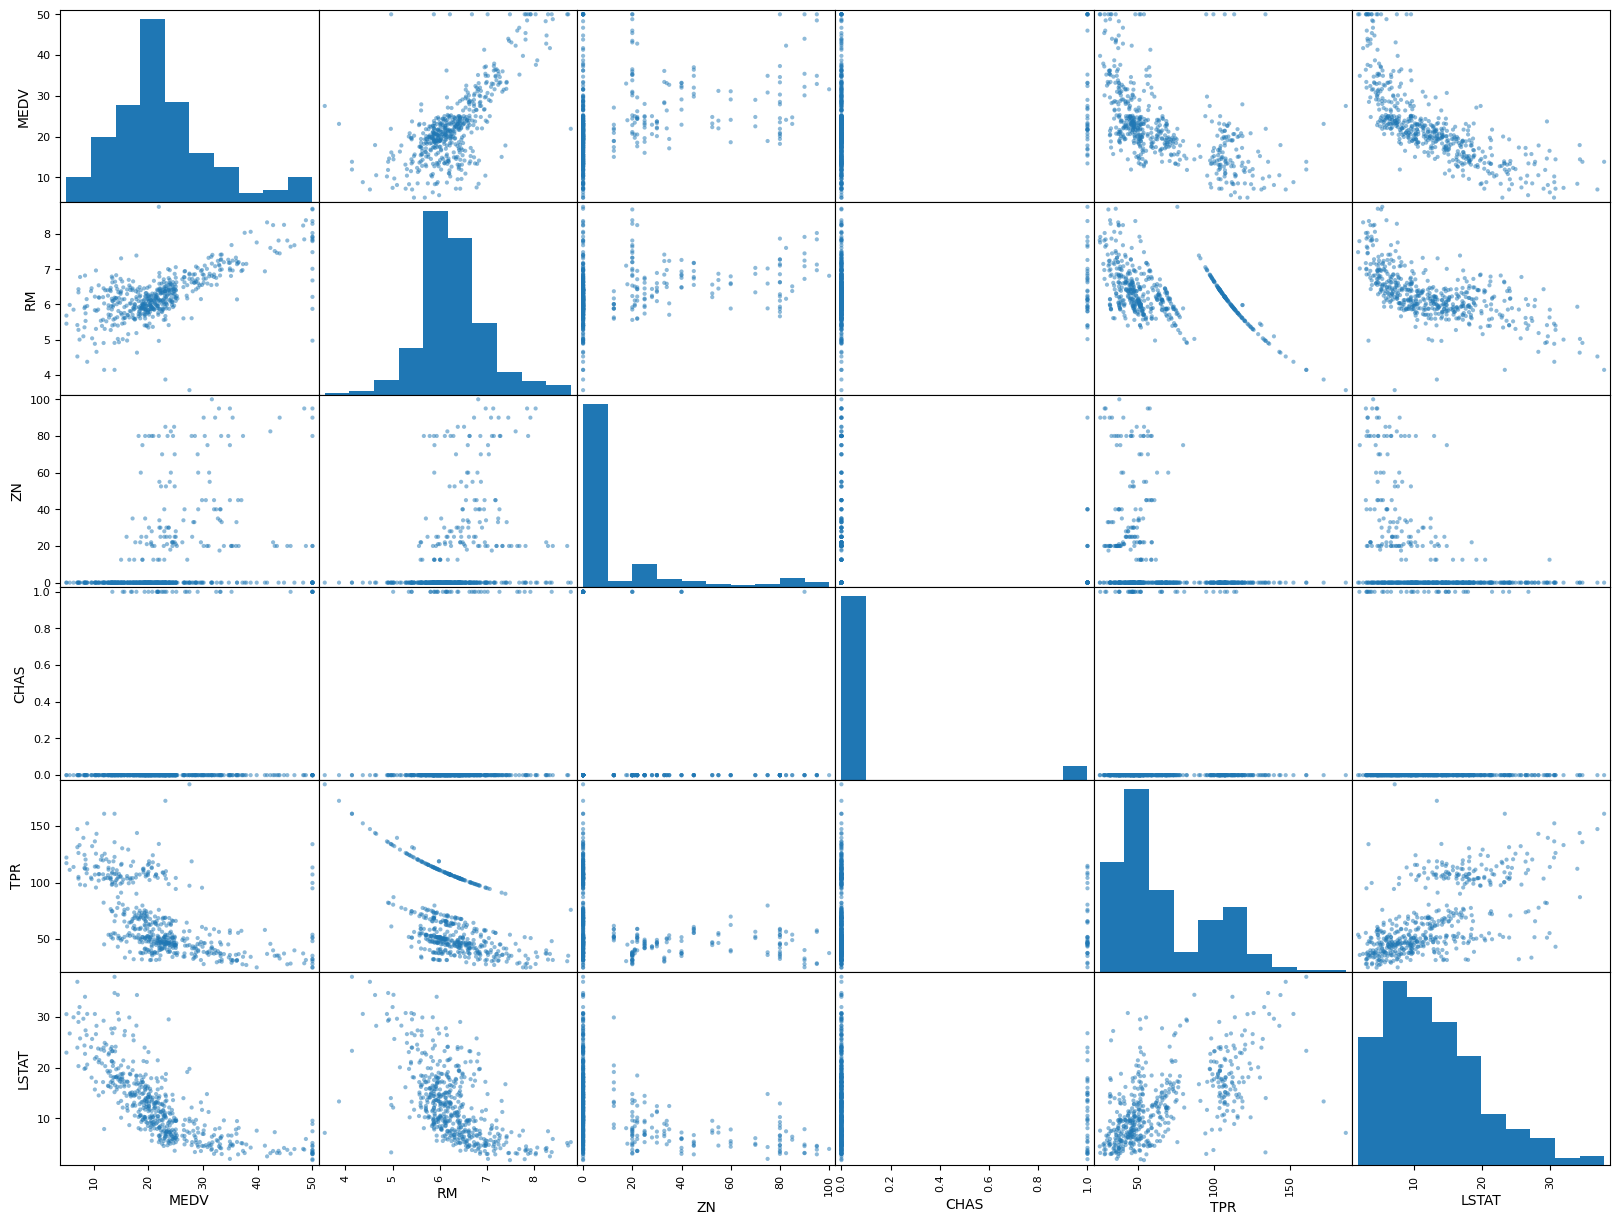

In [343]:
scatter_matrix(housing[new_focus],figsize=(20,15))

# missing data points handling
- remove all the missinng data rows(don't do when already very less datapoints say 506 in this case, if missing cells are random then it can remove the size of data by high amount
- remove the column entirly(don't do when column is important
- `fill with 0, mean, median or any suitable value` : allways prefer this : use IMPUTE MODULE

# scientific notation using string formatting
`f"{value:.2e}"`

In [349]:

f"{housing.AGE.median():.2e}"

'7.75e+01'

In [346]:
s = pd.Series([1234567890, 987654321, 0.00001234, 0.00005678])

# Convert numbers to scientific notation
s_scientific = s.apply(lambda x: f"{x:.2e}")

print(s_scientific)

0    1.23e+09
1    9.88e+08
2    1.23e-05
3    5.68e-05
dtype: object


In [350]:
# upto 1:55

# save this file
# commit upto this & change the branch(from br1 to br2)
# we first drop some random cell  values in excel from 'RM' & save file & re-run all the cells

In [351]:
#remeber what we do as method of dataframe does not change the origna datafram
#it just return a copy
#option 1 : remove the row having missing value
housing.dropna(axis=0,how='any')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TPR
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,41.407553
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,44.607843
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,39.134174
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,40.182514
